In [2]:
pip install Tweepy


Note: you may need to restart the kernel to use updated packages.


In [16]:
import tweepy


In [15]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Hidden for privacy purpose
consumerKey = "X" 
consumerSecret= "X"
accessToken = "X"
accessTokenSecret = "X"

In [19]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [20]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="realDonaldTrump", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1


Show the 5 recent tweets:

1) .@CNN &amp; MSDNC are doing everything possible to “inflame” the crowd. Fortunately they have a very small audience!

2) Much smaller crowd in D.C. than anticipated. National Guard, Secret Service, and D.C. Police have been doing a fantastic job. Thank you!

3) LAW &amp; ORDER!

4) Wow! 96% Approval Rating in the Republican Party (and I believe this was before the “GREAT” Jobs Numbers yesterday). Thank you!

5) https://t.co/hJSsx86Azp



In [21]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,.@CNN &amp; MSDNC are doing everything possibl...
1,Much smaller crowd in D.C. than anticipated. N...
2,LAW &amp; ORDER!
3,Wow! 96% Approval Rating in the Republican Par...
4,https://t.co/hJSsx86Azp


In [22]:

def cleanTxt(text):
     text = re.sub('@[A-Za-z0–9]+', '', text)
     text = re.sub('#', '', text) 
     text = re.sub('RT[\s]+', '', text) # Removing RT
     text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
     return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df


,Tweets
0,. &amp; MSDNC are doing everything possible to...
1,Much smaller crowd in D.C. than anticipated. N...
2,LAW &amp; ORDER!
3,Wow! 96% Approval Rating in the Republican Par...
4,
...,...
95,": I led a letter to w/ Sens Grassley, Crapo, ..."
96,": In particular, I’m pleased the administratio..."
97,: The president should use the Insurrection Ac...
98,": We should have zero tolerance for anarchy, r..."


In [23]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,. &amp; MSDNC are doing everything possible to...,0.740000,-0.002083
1,Much smaller crowd in D.C. than anticipated. N...,0.700000,0.033333
2,LAW &amp; ORDER!,0.000000,0.000000
3,Wow! 96% Approval Rating in the Republican Par...,0.875000,0.562500
4,,0.000000,0.000000
...,...,...,...
95,": I led a letter to w/ Sens Grassley, Crapo, ...",0.000000,0.000000
96,": In particular, I’m pleased the administratio...",0.577778,0.222222
97,: The president should use the Insurrection Ac...,0.050000,-0.050000
98,": We should have zero tolerance for anarchy, r...",1.000000,0.000000


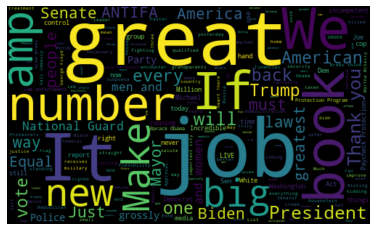

In [24]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [26]:
def getAnalysis(score):
    if score <= 0:
      return 'Toxic'
    else:
      return 'Not-Toxic'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,. &amp; MSDNC are doing everything possible to...,0.740000,-0.002083,Toxic
1,Much smaller crowd in D.C. than anticipated. N...,0.700000,0.033333,Not-Toxic
2,LAW &amp; ORDER!,0.000000,0.000000,Toxic
3,Wow! 96% Approval Rating in the Republican Par...,0.875000,0.562500,Not-Toxic
4,,0.000000,0.000000,Toxic
...,...,...,...,...
95,": I led a letter to w/ Sens Grassley, Crapo, ...",0.000000,0.000000,Toxic
96,": In particular, I’m pleased the administratio...",0.577778,0.222222,Not-Toxic
97,: The president should use the Insurrection Ac...,0.050000,-0.050000,Toxic
98,": We should have zero tolerance for anarchy, r...",1.000000,0.000000,Toxic


In [27]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Not-Toxic'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1


Printing positive tweets:

1) Much smaller crowd in D.C. than anticipated. National Guard, Secret Service, and D.C. Police have been doing a fantastic job. Thank you!

2) Wow! 96% Approval Rating in the Republican Party (and I believe this was before the “GREAT” Jobs Numbers yesterday). Thank you!

3) : . is grossly incompetent, and in no way qualified to be running an important city like Washington, D.C. If…

4) : I am a big fan of Drew Brees. I think he’s truly one of the greatest quarterbacks, but he should not have taken back h…

5) : ...We should be standing up straight and tall, ideally with a salute, or a hand on heart. There are other things you c…

6) : On June 6, 1944, our Greatest Generation bravely stormed the beaches of Normandy.

"Those who fought here won a future for…

7) Riot gear or military control is not necessary because ANTIFA &amp; other Wacko groups of Anarchists aren’t present to cause trouble. Incredible people. Thank you Maine! 

8) Great new book by  called 

In [28]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == ''):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:



In [29]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Not-Toxic']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

52.0

In [30]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Toxic']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

48.0

In [31]:
# Show the value counts
df['Analysis'].value_counts()

Not-Toxic    52
Toxic        48
Name: Analysis, dtype: int64

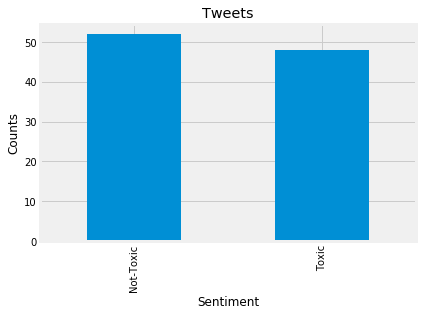

In [33]:
# Plotting and visualizing the counts
plt.title('Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()